**IMPORT LIBRARY**

In [1]:
import os
import zipfile
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy.ndimage
import shutil

# from google.colab import files
from PIL import Image
from matplotlib import pyplot as plt
# from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img, save_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm  # Untuk menampilkan progress bar
from sklearn.utils import resample
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**DOWNLOAD DATA DARI KAGGLE**

In [2]:
# # Mengunggah file Kaggle API key
# files.upload()

# # Membuat direktori untuk kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# # Mengatur permission untuk kaggle.json
# !chmod 600 ~/.kaggle/kaggle.json

# # Mendownload dataset dari Kaggle
# !kaggle datasets download -d andrewmvd/isic-2019

# # Mengekstrak dataset

# with zipfile.ZipFile("isic-2019.zip", "r") as zip_ref:
#     zip_ref.extractall("data")

**HUBUNGKAN KE GOOGLE DRIVE**

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

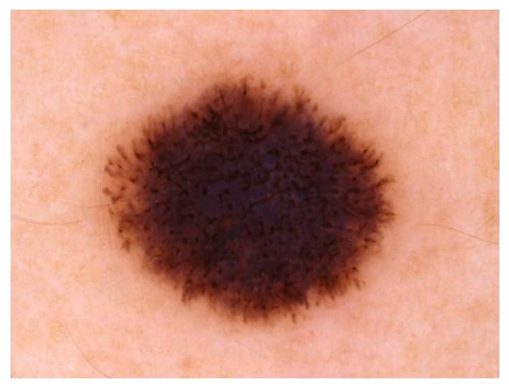

In [4]:
img = cv2.imread('/kaggle/input/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0000199.jpg')
b,g,r = cv2.split(img)       # get b,g,r
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

In [5]:
x,y,z = np.shape(img)
red = np.zeros((x,y,z),dtype=int)
green = np.zeros((x,y,z),dtype=int)
blue = np.zeros((x,y,z),dtype=int)
for i in range(0,x):
    for j in range(0,y):
        red[i][j][0] = rgb_img[i][j][0]
        green[i][j][1]= rgb_img[i][j][1]
        blue[i][j][2] = rgb_img[i][j][2]

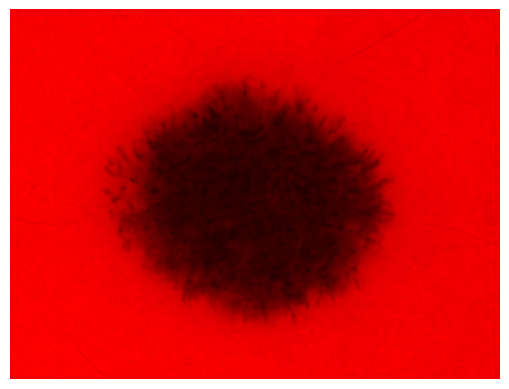

In [6]:
plt.imshow(red)
plt.axis('off')
plt.show()

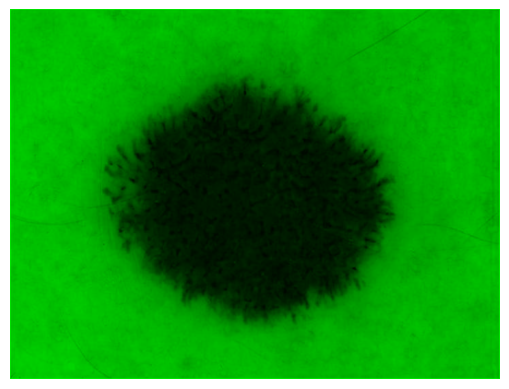

In [7]:
plt.imshow(green)
plt.axis('off')
plt.show()

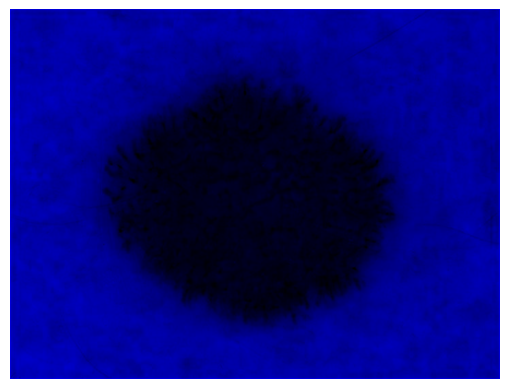

In [8]:
plt.imshow(blue)
plt.axis('off')
plt.show()

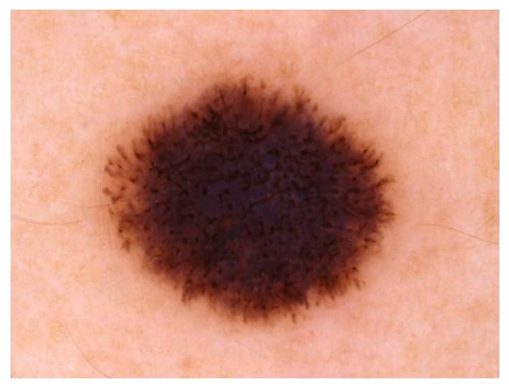

In [9]:
#Now we will again create the original image from these Red, Blue and Green Images
retrack_original = np.zeros((x,y,z),dtype=int)
for i in range(0,x):
    for j in range(0,y):
        retrack_original[i][j][0] = red[i][j][0]
        retrack_original[i][j][1] = green[i][j][1]
        retrack_original[i][j][2] = blue[i][j][2]
cv2.imwrite('ori.jpg',retrack_original)
plt.imshow(retrack_original)
plt.axis('off')
plt.show()

**NILAI PIKSEL CITRA DALAM BENTUK MATRIKS**

In [10]:
# Membaca Gambar
img = cv2.imread('/kaggle/input/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0000199.jpg')

# Memeriksa dimensi gambar
print(f"Dimensi gambar: {img.shape}")

# Mendapatkan nilai piksel pada lapisan red, green, dan blue
red_channel = img[:, :, 2]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 0]

# Menampilkan nilai piksel pada lapisan red, green, dan blue
print("Nilai piksel pada lapisan Red (R):")
print(red_channel)

print("Nilai piksel pada lapisan Green (G):")
print(green_channel)

print("Nilai piksel pada lapisan Blue (B):")
print(blue_channel)

Dimensi gambar: (542, 718, 3)
Nilai piksel pada lapisan Red (R):
[[255 243 255 ... 255 247 255]
 [255 208 243 ... 229 194 255]
 [255 212 241 ... 219 188 255]
 ...
 [255 180 213 ... 234 217 255]
 [253 191 221 ... 227 218 255]
 [255 255 255 ... 255 255 255]]
Nilai piksel pada lapisan Green (G):
[[250 224 247 ... 242 221 250]
 [240 188 215 ... 185 166 238]
 [243 184 206 ... 174 159 245]
 ...
 [247 154 180 ... 183 177 244]
 [234 171 194 ... 179 179 227]
 [250 241 249 ... 237 239 245]]
Nilai piksel pada lapisan Blue (B):
[[253 226 250 ... 239 220 248]
 [240 187 214 ... 182 163 234]
 [239 180 202 ... 169 155 239]
 ...
 [250 153 173 ... 182 178 245]
 [236 170 187 ... 179 182 230]
 [253 241 241 ... 237 244 250]]


**MENGHAPUS DIREKTORI**

In [11]:
import os
import shutil

directory = '/kaggle/working/resized224_isic2019'
if os.path.exists(directory):
    shutil.rmtree(directory)
    print(f"Directory {directory} removed.")
else:
    print(f"Directory {directory} does not exist.")

os.makedirs(directory)
print(f"Directory {directory} created.")

Directory /kaggle/working/resized224_isic2019 does not exist.
Directory /kaggle/working/resized224_isic2019 created.


In [12]:
import os
import shutil

directory = '/kaggle/working/dullrazor_isic2019'
if os.path.exists(directory):
    shutil.rmtree(directory)
    print(f"Directory {directory} removed.")
else:
    print(f"Directory {directory} does not exist.")

os.makedirs(directory)
print(f"Directory {directory} created.")

Directory /kaggle/working/dullrazor_isic2019 does not exist.
Directory /kaggle/working/dullrazor_isic2019 created.


In [13]:
import os
import shutil

directory = '/kaggle/working/normalized_isic2019'
if os.path.exists(directory):
    shutil.rmtree(directory)
    print(f"Directory {directory} removed.")
else:
    print(f"Directory {directory} does not exist.")

os.makedirs(directory)
print(f"Directory {directory} created.")

Directory /kaggle/working/normalized_isic2019 does not exist.
Directory /kaggle/working/normalized_isic2019 created.


In [14]:
import os
import shutil

directory = '/kaggle/working/pelabelancitra_isic2019'
if os.path.exists(directory):
    shutil.rmtree(directory)
    print(f"Directory {directory} removed.")
else:
    print(f"Directory {directory} does not exist.")

os.makedirs(directory)
print(f"Directory {directory} created.")

Directory /kaggle/working/pelabelancitra_isic2019 does not exist.
Directory /kaggle/working/pelabelancitra_isic2019 created.


**RESIZE SEMUA CITRA MENJADI UKURAN 224 X 224 PIKSEL**

In [15]:
import os
import shutil

directory = '/kaggle/working/training dan testing'
if os.path.exists(directory):
    shutil.rmtree(directory)
    print(f"Directory {directory} removed.")
else:
    print(f"Directory {directory} does not exist.")

os.makedirs(directory)
print(f"Directory {directory} created.")

Directory /kaggle/working/training dan testing does not exist.
Directory /kaggle/working/training dan testing created.


In [ ]:
# Tentukan direktori input dan output
input_dir = '/kaggle/input/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input'
output_dir = '/kaggle/working/resized224_isic2019'
# Buat folder output jika belum ada
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Ukuran baru citra
new_size = (224, 224)

# Fungsi untuk resize dan simpan citra menggunakan interpolasi bilinear
def resize_and_save(input_path, output_path, size):
    img = Image.open(input_path)
    img = img.resize(size, Image.BILINEAR)
    img.save(output_path)

# Loop melalui semua file dalam direktori input
for filename in os.listdir(input_dir):
    input_path = os.path.join(input_dir, filename)
    output_path = os.path.join(output_dir, filename)

    try:
        resize_and_save(input_path, output_path, new_size)
        print(f'Successfully resized and saved {filename}')
    except Exception as e:
        print(f'Error processing {filename}: {e}')

**MENAMPILKAN JUMLAH GAMBAR PADA DATASET**

In [17]:
# Tentukan path folder yang berisi gambar
folder_path = '/kaggle/working/resized224_isic2019'

# Daftar ekstensi file gambar yang umum
image_extensions = ['.jpg']

# Inisialisasi penghitung
image_count = 0

# Iterasi melalui semua file dalam folder
for filename in os.listdir(folder_path):
    # Cek apakah file memiliki salah satu ekstensi gambar
    if any(filename.lower().endswith(ext) for ext in image_extensions):
        image_count += 1

# Tampilkan jumlah gambar
print(f"Jumlah gambar dalam folder '{folder_path}': {image_count}")

Jumlah gambar dalam folder '/kaggle/working/resized224_isic2019': 25331


**MENGETAHUI DIMENSI GAMBAR PADA CITRA**

In [18]:
# Membaca gambar
image = cv2.imread('/kaggle/working/resized224_isic2019/ISIC_0000214.jpg')

# Memeriksa dimensi gambar
print(f"Dimensi gambar: {image.shape}")

Dimensi gambar: (224, 224, 3)


**MENGHILANGKAN CITRA RAMBUT UNTUK SEMUA CITRA**

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def dull_razor_filtering(image_path, kernel_size=9, threshold_value=5, inpaint_radius=3):
    # Membaca citra
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Konversi citra ke grayscale
    gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Membuat structuring element (disk)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

    # Mengaplikasikan black hat filtering
    blackhat = cv2.morphologyEx(gray_scale, cv2.MORPH_BLACKHAT, kernel)

    # Menghaluskan hasil black hat filtering
    blurred_blackhat = cv2.GaussianBlur(blackhat, (3, 3), cv2.BORDER_DEFAULT)

    # Thresholding untuk membuat binary mask
    _, binary_mask = cv2.threshold(blurred_blackhat, threshold_value, 255, cv2.THRESH_BINARY)

    # Inpainting untuk menghapus rambut dari citra
    cleaned_image = cv2.inpaint(image, binary_mask, inpaint_radius, cv2.INPAINT_TELEA)

    return cleaned_image

def process_images_in_folder(folder_path, output_folder, kernel_size=9, threshold_value=5, inpaint_radius=3):
    # Membuat folder output jika belum ada
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop melalui semua file dalam folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            print(f"Processing {file_path}...")
            # Terapkan dull razor filtering
            result_image = dull_razor_filtering(file_path, kernel_size, threshold_value, inpaint_radius)

            # Simpan citra hasil
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, result_image)

# Path ke folder citra
folder_path = '/kaggle/working/resized224_isic2019'
output_folder = '/kaggle/working/dullrazor_isic2019'

# Penerapan dull razor filtering pada semua citra dalam folder
process_images_in_folder(folder_path, output_folder)

Processing /kaggle/working/resized224_isic2019/ISIC_0031317.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0060835.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0025209.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0068295.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0054615.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0063221.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0065842.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0072244.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0069357.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0060467.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0057487.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0030857.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0029135.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0064858.jpg...
Processing /kaggle/working/resized224_isic2019/ISIC_0055164.jp

**MENGHITUNG JUMLAH GAMBAR DI DIREKTORI**

In [20]:
# Path ke direktori yang ingin Anda cek
directory = '/kaggle/working/dullrazor_isic2019'

# Menghitung jumlah file dalam direktori
file_count = len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

print(f"Jumlah file di dalam direktori '{directory}': {file_count}")

Jumlah file di dalam direktori '/kaggle/working/dullrazor_isic2019': 25331


**MELAKUKAN NORMALISASI UNTUK SEMUA CITRA**

In [21]:
# Path ke direktori citra input dan output
input_path = '/kaggle/working/dullrazor_isic2019'
output_path = '/kaggle/working/normalized_isic2019'

# Membuat direktori output jika belum ada
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Fungsi untuk melakukan normalisasi
def normalize_image(image):
    # Mengubah tipe data citra menjadi float32 agar bisa dilakukan pembagian
    image = image.astype(np.float32)
    # Normalisasi dengan membagi nilai piksel dengan 255
    normalized_image = image / 255.0
    return normalized_image

# Fungsi untuk menyimpan citra dalam format .jpg dan .npy
def save_image_and_npy(img_name, normalized_image):
    # Path ke file .npy
    npy_path = os.path.join(output_path, img_name.replace('.jpg', '.npy'))
    # Simpan citra normalisasi sebagai file .npy
    np.save(npy_path, normalized_image)

    # Path ke file .jpg
    jpg_path = os.path.join(output_path, img_name)
    # Konversi citra normalisasi dari [0, 1] ke [0, 255] dan simpan sebagai .jpg
    image_to_save = (normalized_image * 255).astype(np.uint8)
    cv2.imwrite(jpg_path, image_to_save)

# Loop melalui setiap citra dalam direktori input
for img_name in os.listdir(input_path):
    if img_name.endswith('.jpg'):
        # Path ke file gambar input
        img_path = os.path.join(input_path, img_name)
        # Baca citra
        image = cv2.imread(img_path)
        # Normalisasi citra
        normalized_image = normalize_image(image)
        # Simpan citra dalam format .jpg dan .npy
        save_image_and_npy(img_name, normalized_image)

print("Semua citra telah dinormalisasi dan disimpan.")

Semua citra telah dinormalisasi dan disimpan.


**PELABELAN CITRA DAN MENGELOMPOKKAN CITRA BERDASARKAN KELASNYA**

In [22]:
# Memuat File CSV

skin_cancer_df = pd.read_csv('/kaggle/input/isic-2019/ISIC_2019_Training_GroundTruth.csv')
skin_cancer_df.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
skin_cancer_df

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# We do not any image of UNK so Droping UNK
skin_cancer_df.drop('UNK',axis=1,inplace=True)
cols=['NV','BCC','AK','BKL','DF','VASC','SCC','MEL']

In [25]:
# Menambahkan kolom 'image_path' ke skin_cancer_df
image_dir = '/kaggle/working/normalized_isic2019/'
skin_cancer_df['image_path'] = skin_cancer_df['image'].apply(lambda x: f"{image_dir}{x}.jpg")

In [26]:
# Mapping dari nama penyakit ke label numerik
label_mapping = {
    'AK': 0,   # Actinic Keratosis
    'BCC': 1,  # Basal Cell Carcinoma
    'BKL': 2,  # Benign Keratosis Lesion
    'DF': 3,   # Dermatofibroma
    'MEL': 4,  # Melanoma
    'NV': 5,   # Melanocytic Nevus
    'SCC': 6,  # Squamous Cell Carcinoma
    'VASC': 7  # Vascular Lesion
}

# Menambahkan kolom 'label' ke DataFrame berdasarkan kelas
def assign_label(row):
    for col, label in label_mapping.items():
        if row[col] == 1:
            return label
    return -1  # Return -1 jika tidak ada label yang sesuai

skin_cancer_df['label'] = skin_cancer_df.apply(assign_label, axis=1)

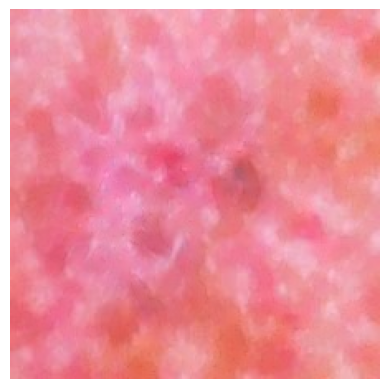

In [27]:
import matplotlib.pyplot as plt
import cv2

# Path ke gambar
image_path = '/kaggle/working/normalized_isic2019/ISIC_0024468.jpg'

# Membaca gambar dengan OpenCV
image = cv2.imread(image_path)

# Mengonversi gambar dari BGR (OpenCV default) ke RGB (Matplotlib default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar
plt.imshow(image_rgb)
plt.axis('off')  # Menghilangkan sumbu
plt.show()

In [28]:
# Membuat DataFrame untuk Tabel 4.1
label_table = pd.DataFrame(list(label_mapping.items()), columns=['Jenis Kelas Penyakit Kanker Kulit', 'Pelabelan'])

# Menampilkan tabel
print(label_table)

  Jenis Kelas Penyakit Kanker Kulit  Pelabelan
0                                AK          0
1                               BCC          1
2                               BKL          2
3                                DF          3
4                               MEL          4
5                                NV          5
6                               SCC          6
7                              VASC          7


In [29]:
# Menghitung jumlah gambar di setiap label
label_counts = skin_cancer_df['label'].value_counts().sort_index()

# Menampilkan jumlah gambar di setiap label
for label, count in label_counts.items():
    print(f"Total images with label {label}: {count}")

Total images with label 0: 867
Total images with label 1: 3323
Total images with label 2: 2624
Total images with label 3: 239
Total images with label 4: 4522
Total images with label 5: 12875
Total images with label 6: 628
Total images with label 7: 253


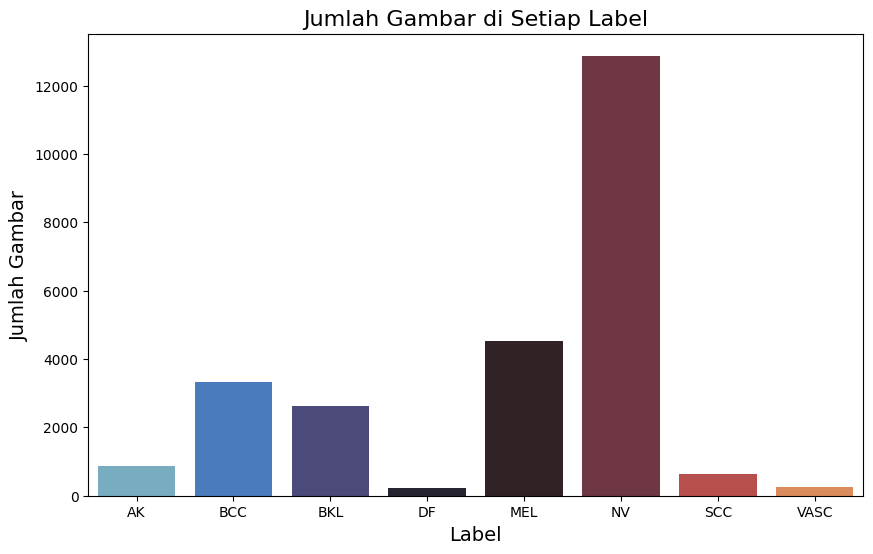

In [30]:
# Menghitung jumlah gambar di setiap label
label_counts = skin_cancer_df['label'].value_counts().sort_index()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Gambar di Setiap Label', fontsize=16)
sns.countplot(x='label', data=skin_cancer_df, palette='icefire')
plt.xlabel('Label', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)

# Mengatur label pada sumbu x
plt.xticks(label_counts.index, [list(label_mapping.keys())[i] for i in label_counts.index])

# Menampilkan grafik
plt.show()

**MENGELOMPOKKAN GAMBAR KE DALAM DIREKTORI GOOGLE DRIVE SESUAI DENGAN LABEL YANG DIBERIKAN**

In [31]:
# Definisikan direktori tujuan di Google Drives
base_dir = '/kaggle/working/pelabelancitra_isic2019'
labels = ['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']

# Buat subdirektori untuk setiap label jika belum ada
for label in labels:
    os.makedirs(os.path.join(base_dir, label), exist_ok=True)

# Iterasi melalui DataFrame dan salin gambar ke subdirektori sesuai label
for index, row in skin_cancer_df.iterrows():
    img_path = row['image_path']
    label = row['label']
    label_name = labels[label]

    # Definisikan jalur tujuan
    dest_dir = os.path.join(base_dir, label_name)

    # Salin gambar ke subdirektori
    shutil.copy(img_path, dest_dir)

print("Semua gambar telah dipindahkan ke direktori yang sesuai.")

# Verifikasi jumlah gambar di setiap direktori
folders = [
    os.path.join(base_dir, 'AK'),
    os.path.join(base_dir, 'BCC'),
    os.path.join(base_dir, 'BKL'),
    os.path.join(base_dir, 'DF'),
    os.path.join(base_dir, 'MEL'),
    os.path.join(base_dir, 'NV'),
    os.path.join(base_dir, 'SCC'),
    os.path.join(base_dir, 'VASC')
]

# Hitung dan cetak jumlah gambar di setiap direktori
for folder_path in folders:
    if os.path.exists(folder_path):
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"Jumlah gambar di {folder_path}: {num_files}")
    else:
        print(f"Direktori tidak ditemukan: {folder_path}")

Semua gambar telah dipindahkan ke direktori yang sesuai.
Jumlah gambar di /kaggle/working/pelabelancitra_isic2019/AK: 867
Jumlah gambar di /kaggle/working/pelabelancitra_isic2019/BCC: 3323
Jumlah gambar di /kaggle/working/pelabelancitra_isic2019/BKL: 2624
Jumlah gambar di /kaggle/working/pelabelancitra_isic2019/DF: 239
Jumlah gambar di /kaggle/working/pelabelancitra_isic2019/MEL: 4522
Jumlah gambar di /kaggle/working/pelabelancitra_isic2019/NV: 12875
Jumlah gambar di /kaggle/working/pelabelancitra_isic2019/SCC: 628
Jumlah gambar di /kaggle/working/pelabelancitra_isic2019/VASC: 253


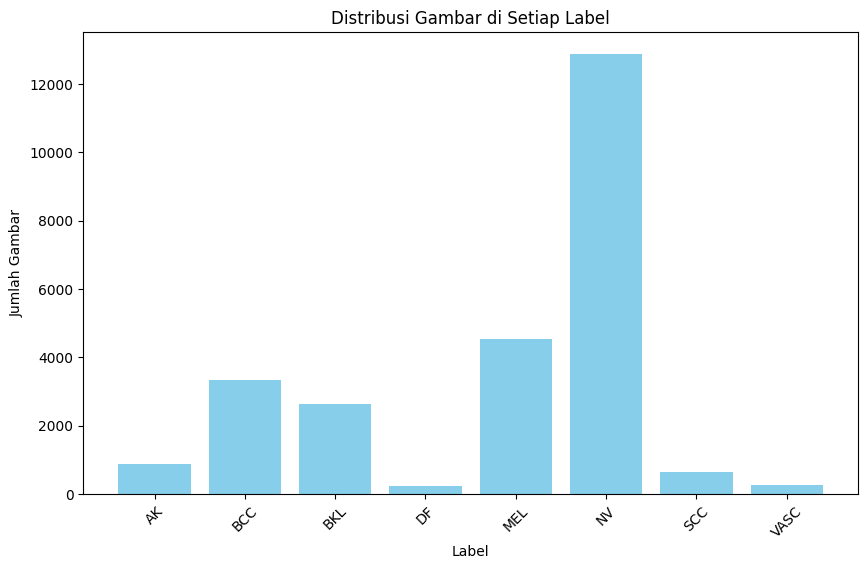

In [32]:
import os
import matplotlib.pyplot as plt

# Definisikan direktori tujuan di Google Drive
base_dir = '/kaggle/working/pelabelancitra_isic2019'
labels = ['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']

# List untuk menyimpan jumlah gambar per label
image_counts = []

# Hitung jumlah gambar di setiap direktori
for label in labels:
    folder_path = os.path.join(base_dir, label)
    if os.path.exists(folder_path):
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        image_counts.append(num_files)
    else:
        image_counts.append(0)  # Jika folder tidak ada, tambahkan 0

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(labels, image_counts, color='skyblue')
plt.xlabel('Label')
plt.ylabel('Jumlah Gambar')
plt.title('Distribusi Gambar di Setiap Label')
plt.xticks(rotation=45)
plt.show()

**PEMBAGIAN DATA (80% TRAINING DAN 20% TESTING)**

In [33]:
import os

# Path direktori baru
new_dir = "/kaggle/working/training dan testing"

# Membuat direktori baru
if not os.path.exists(new_dir):
    os.makedirs(new_dir)
    print(f"Direktori '{new_dir}' berhasil dibuat.")
else:
    print(f"Direktori '{new_dir}' sudah ada.")

Direktori '/kaggle/working/training dan testing' sudah ada.


In [34]:
# Membagi data menjadi data latih dan data uji
train_df, test_df = train_test_split(skin_cancer_df, test_size=0.2, stratify=skin_cancer_df['label'], random_state=42)

In [35]:
# Mengecek jumlah data di setiap kelas untuk data latih
train_counts = train_df['label'].value_counts().sort_index()
print("Distribusi kelas pada data latih:")
for label, count in train_counts.items():
    print(f"Total images with label {label}: {count}")

# Mengecek jumlah data di setiap kelas untuk data uji
test_counts = test_df['label'].value_counts().sort_index()
print("\nDistribusi kelas pada data uji:")
for label, count in test_counts.items():
    print(f"Total images with label {label}: {count}")

# Menyimpan data latih dan data uji ke file CSV (opsional)
train_df.to_csv('/kaggle/working/training dan testing/train_data.csv', index=False)
test_df.to_csv('/kaggle/working/training dan testing/test_data.csv', index=False)

Distribusi kelas pada data latih:
Total images with label 0: 694
Total images with label 1: 2658
Total images with label 2: 2099
Total images with label 3: 191
Total images with label 4: 3618
Total images with label 5: 10300
Total images with label 6: 502
Total images with label 7: 202

Distribusi kelas pada data uji:
Total images with label 0: 173
Total images with label 1: 665
Total images with label 2: 525
Total images with label 3: 48
Total images with label 4: 904
Total images with label 5: 2575
Total images with label 6: 126
Total images with label 7: 51


In [36]:
skin_cancer_df['label'] = skin_cancer_df.apply(assign_label, axis=1)

# Menghitung jumlah gambar di setiap label untuk data latih dan data uji
train_counts = train_df['label'].value_counts().sort_index()
# train_counts = train_df_balanced['label'].value_counts().sort_index()
test_counts = test_df['label'].value_counts().sort_index()

# Menyusun tabel pembagian data
data_split_table = pd.DataFrame({
    'Kelas': [label_mapping[label] for label in label_mapping.keys()],
    'Data Train (80%)': train_counts.reindex(range(8), fill_value=0).values,
    'Data Test (20%)': test_counts.reindex(range(8), fill_value=0).values
})

# Menambahkan jumlah total
data_split_table.loc['Jumlah'] = data_split_table[['Data Train (80%)', 'Data Test (20%)']].sum()

# Menampilkan tabel
print("Tabel 4.2 Skenario Pembagian Data")
print(data_split_table)

# Menyimpan DataFrame pembagian data jika diperlukan
data_split_table.to_csv('/kaggle/working/training dan testing/data_split_table.csv', index=False)

Tabel 4.2 Skenario Pembagian Data
        Kelas  Data Train (80%)  Data Test (20%)
0         0.0             694.0            173.0
1         1.0            2658.0            665.0
2         2.0            2099.0            525.0
3         3.0             191.0             48.0
4         4.0            3618.0            904.0
5         5.0           10300.0           2575.0
6         6.0             502.0            126.0
7         7.0             202.0             51.0
Jumlah    NaN           20264.0           5067.0


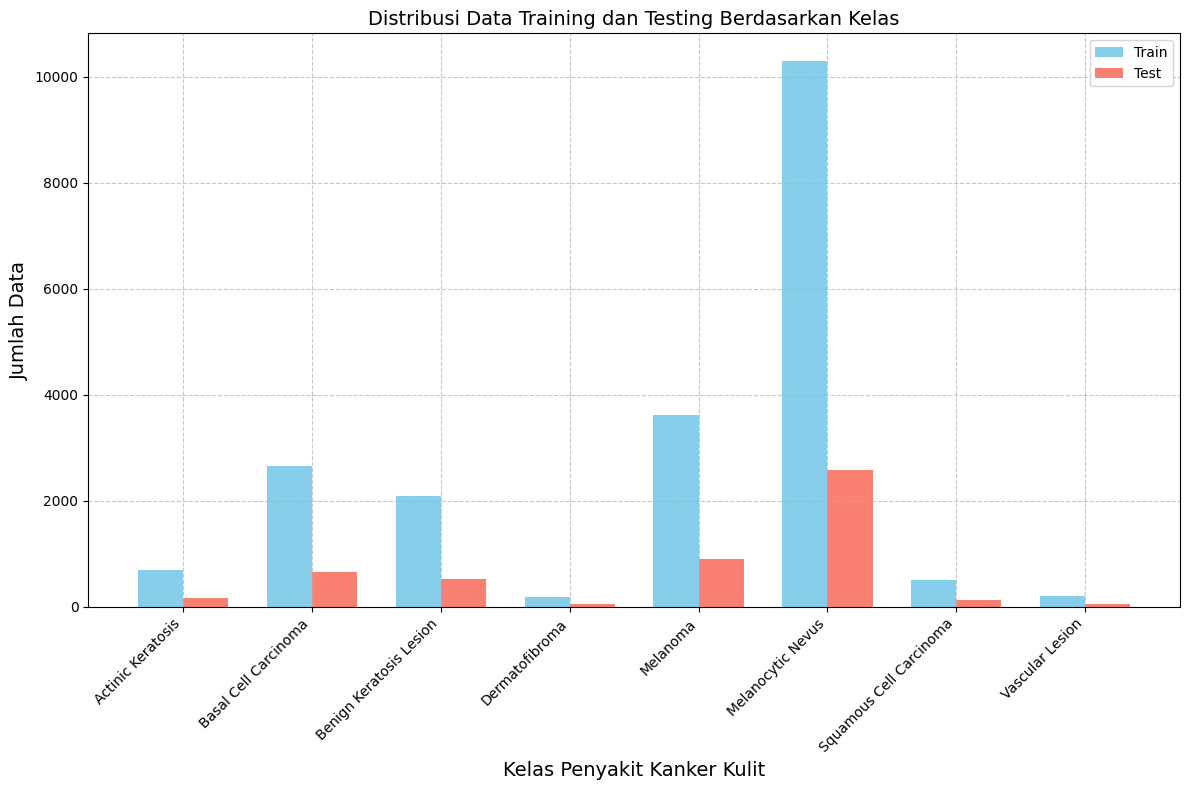

In [37]:
# Data pembagian kelas
classes = ['Actinic Keratosis', 'Basal Cell Carcinoma', 'Benign Keratosis Lesion',
           'Dermatofibroma', 'Melanoma', 'Melanocytic Nevus',
           'Squamous Cell Carcinoma', 'Vascular Lesion']

train_counts = [694, 2658, 2099, 191, 3618, 10300, 502, 202]
test_counts = [173, 665, 525, 48, 904, 2575, 126, 51]

# Tentukan posisi batang
ind = np.arange(len(classes))

# Lebar batang
width = 0.35

# Membuat plot batang
plt.figure(figsize=(12, 8))

# Batang untuk Data Train
plt.bar(ind - width/2, train_counts, width, color='skyblue', label='Train')

# Batang untuk Data Test
plt.bar(ind + width/2, test_counts, width, color='salmon', label='Test')

# Menambahkan label, judul, dan grid
plt.xlabel('Kelas Penyakit Kanker Kulit', fontsize=14)
plt.ylabel('Jumlah Data', fontsize=14)
plt.title('Distribusi Data Training dan Testing Berdasarkan Kelas', fontsize=14)
plt.xticks(ind, classes, rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

**MENYIMPAN HASIL TRAINING (SETELAH DILAKUKAN BALANCING DATA) DAN TESTING KE DRIVE**

In [38]:
# Definisikan direktori utama di Google Drive
base_train_dir = '/kaggle/working/training dan testing/train_isic2019'
base_test_dir = '/kaggle/working/training dan testing/test_isic2019'

# Daftar label dan nama kelas
labels = ['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']

# Buat subdirektori untuk setiap label di direktori train dan test
for label in labels:
    os.makedirs(os.path.join(base_train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(base_test_dir, label), exist_ok=True)

# Fungsi untuk memindahkan gambar berdasarkan DataFrame
def move_images(df, base_dir):
    for index, row in df.iterrows():
        img_path = row['image_path']
        label = row['label']
        label_name = labels[label]

        # Definisikan jalur tujuan
        dest_dir = os.path.join(base_dir, label_name)

        # Salin gambar ke subdirektori
        shutil.copy(img_path, dest_dir)

# Pindahkan gambar training
move_images(train_df, base_train_dir)
# move_images(train_df_balanced, base_train_dir)

# Pindahkan gambar testing
move_images(test_df, base_test_dir)

print("Semua gambar telah dipindahkan ke direktori train dan test.")

Semua gambar telah dipindahkan ke direktori train dan test.


**AUGMENTASI DATA**

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mendefinisikan ImageDataGenerator untuk augmentasi data
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,          # Rotate images by up to 30 degrees
    width_shift_range=0.2,      # Horizontal shifting
    height_shift_range=0.2,     # Vertical shifting
    shear_range=0.2,            # Shearing
    zoom_range=0.2,             # Zoom
    horizontal_flip=True,
    fill_mode='nearest'
)

In [40]:
test_data = ImageDataGenerator(rescale=1./255)
# test_data = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=30,          # Rotate images by up to 30 degrees
#     width_shift_range=0.2,      # Horizontal shifting
#     height_shift_range=0.2,     # Vertical shifting
#     shear_range=0.2,            # Shearing
#     zoom_range=0.2,             # Zoom
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

In [41]:
# Load the training data

train_gen = train_data.flow_from_directory(
        base_train_dir,              # Direktori data training
        target_size=(224, 224),     # Ukuran gambar yang akan dihasilkan
        batch_size=32,              # Ukuran batch
        class_mode='categorical',   # Jenis label (categorical untuk multi-class classification)
        subset="training")          # Subset data jika ada (hapus jika tidak diperlukan)

Found 20264 images belonging to 8 classes.


In [57]:
# Load the test data

test_gen = test_data.flow_from_directory(
    base_test_dir,                # Direktori data testing
    target_size=(224, 224),       # Ukuran gambar yang akan dihasilkan
    batch_size=32,                # Ukuran batch
    class_mode='categorical',      # Jenis label (categorical untuk multi-class classification)
    shuffle=False
)

Found 5067 images belonging to 8 classes.


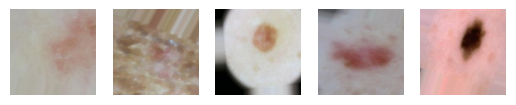

In [58]:
# Menampilkan contoh gambar dari training set yang telah diaugmentasi

x_batch, y_batch = next(train_gen)  # Mengambil satu batch gambar dan label
for i in range(0, 5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.show()

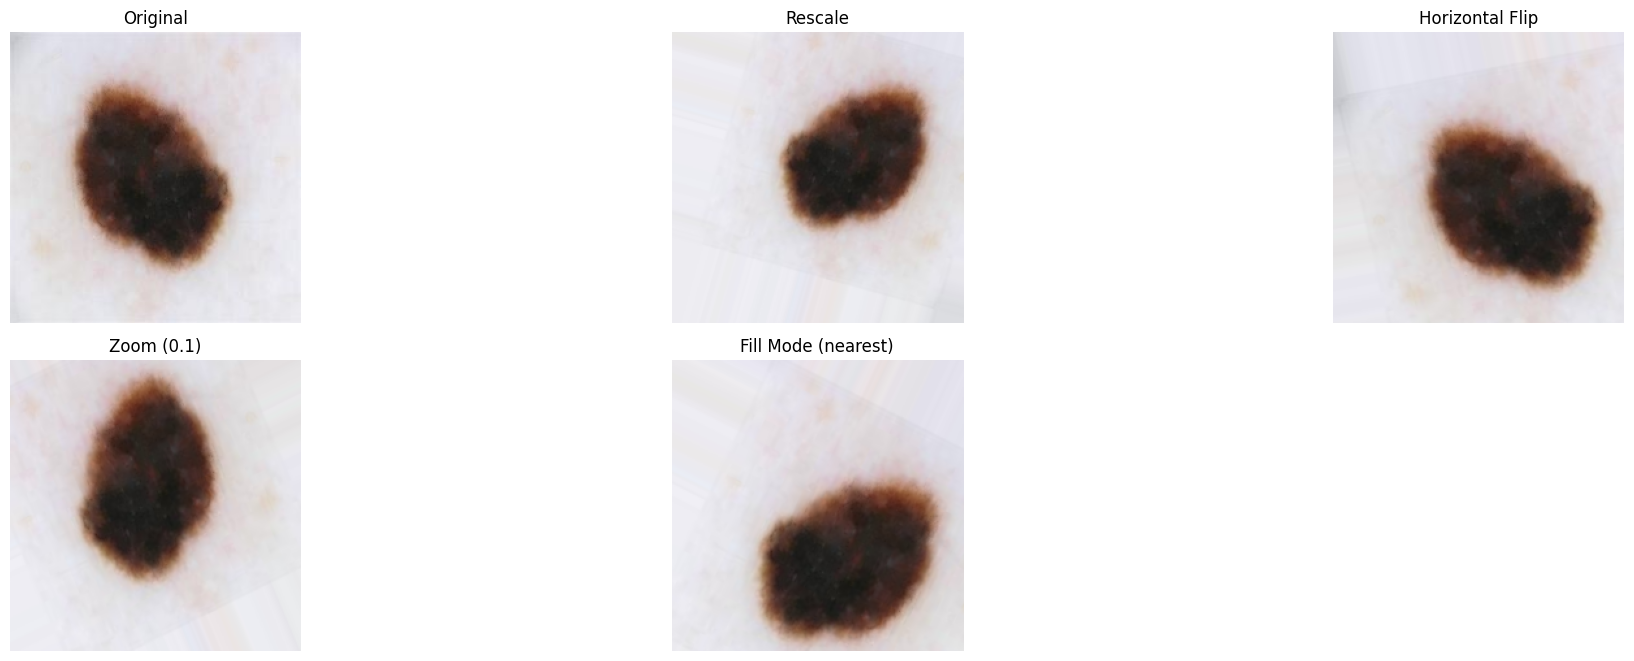

In [59]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Memuat satu gambar untuk di-augmentasi
img = load_img('/kaggle/working/training dan testing/train_isic2019/MEL/ISIC_0000013.jpg')  # Ganti dengan path gambar Anda
img_array = img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)  # Mengubah ukuran array menjadi (1, tinggi, lebar, kanal)

# Menghasilkan beberapa gambar yang telah di-augmentasi
augmented_images = train_data.flow(img_array, batch_size=1)

# Augmentasi yang diterapkan dan labelnya
augmentations = [
    "Original",
    "Rescale",
    "Horizontal Flip",
    "Zoom (0.1)",
    "Fill Mode (nearest)"
]

# Menampilkan hasil augmentasi dengan keterangan
plt.figure(figsize=(20, 10))  # Mengatur ukuran figure lebih besar jika diperlukan
for i in range(len(augmentations)):
    plt.subplot(3, 3, i + 1)  # Mengatur grid subplot menjadi 3x3
    if i == 0:
        # Tampilkan gambar asli untuk referensi
        plt.imshow(img_array[0] / 255.0)  # Normalisasi untuk menampilkan gambar
    else:
        batch = next(augmented_images)
        img_augmented = batch[0]
        plt.imshow(img_augmented)
    plt.title(augmentations[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

**RESNET50**

In [61]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import ResNet50, EfficientNetB0, DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)  # This layer expects a 4D input
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
reduce_lr_v2 = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7)

predictions = Dense(8, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the top layers of ResNet50
# for layer in base_model.layers[:100]:  # Unfreeze from a deeper layer
for layer in base_model.layers[-20:]:
    layer.trainable = False

# Compile the model again with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and checkpointing
checkpoint = ModelCheckpoint('/kaggle/working/training dan testing/best_model_cpu.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=60,  # Mulai dengan 5 epoch untuk menghindari proses training yang terlalu lama
#     callbacks=[checkpoint, reduce_lr, early_stopping],
    callbacks=[checkpoint, early_stopping],
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_steps=test_gen.samples // test_gen.batch_size,
    verbose=1
)

Epoch 1/60
633/633 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.3564 - loss: 15.5994
Epoch 1: val_accuracy improved from -inf to 0.03046, saving model to /kaggle/working/training dan testing/best_model_cpu.keras
633/633 ━━━━━━━━━━━━━━━━━━━━ 339s 460ms/step - accuracy: 0.3566 - loss: 15.5987 - val_accuracy: 0.0305 - val_loss: 30.6494
Epoch 2/60
  1/633 ━━━━━━━━━━━━━━━━━━━━ 3:14 308ms/step - accuracy: 0.7188 - loss: 14.1013
Epoch 2: val_accuracy did not improve from 0.03046
633/633 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7188 - loss: 14.1013 - val_accuracy: 0.0000e+00 - val_loss: 34.6339
Epoch 3/60
633/633 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.5851 - loss: 14.3688
Epoch 3: val_accuracy improved from 0.03046 to 0.64379, saving model to /kaggle/working/training dan testing/best_model_cpu.keras
633/633 ━━━━━━━━━━━━━━━━━━━━ 272s 425ms/step - accuracy: 0.5851 - loss: 14.3684 - val_accuracy: 0.6438 - val_loss: 13.6902
Epoch 4/60
  1/633 ━━━━━━━━━━━━━━━━━━━━ 3:16 311ms/ste

**MENAMPILKAN RINGKASAN MODEL**

In [62]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 59,121,562 (225.53 MB)

 Trainable params: 16,711,688 (63.75 MB)

 Non-trainable params: 8,986,496 (34.28 MB)

 Optimizer params: 33,423,378 (127.50 MB)

**EVALUASI MODEL**

In [63]:
# Evaluasi model pada data testing
test_loss, test_accuracy = model.evaluate(test_gen, steps=test_gen.samples // test_gen.batch_size, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

158/158 ━━━━━━━━━━━━━━━━━━━━ 52s 330ms/step - accuracy: 0.7090 - loss: 3.1789
Test Loss: 3.003418207168579
Test Accuracy: 0.767405092716217


**LEARNING CURVE**

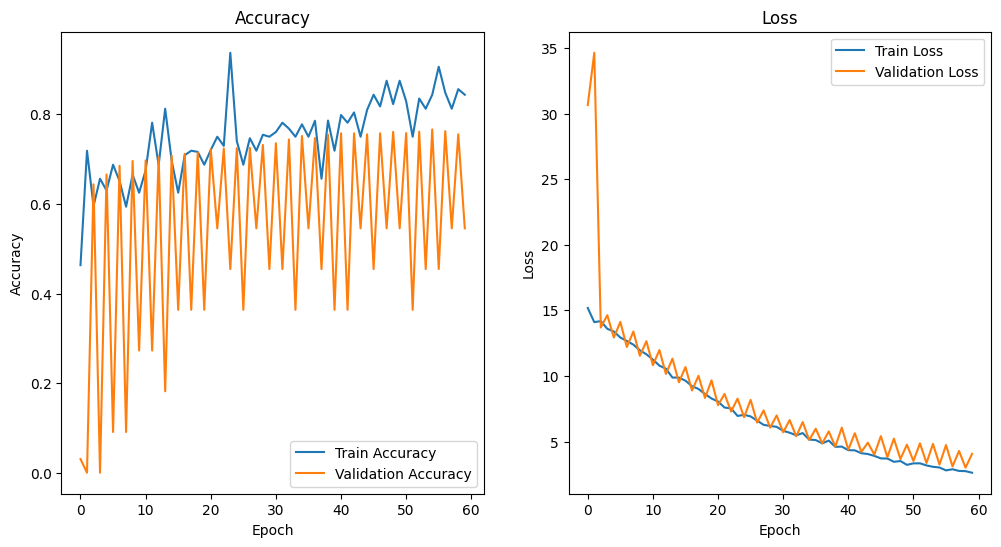

In [64]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**CONFUSION MATRIX**

159/159 ━━━━━━━━━━━━━━━━━━━━ 58s 345ms/step


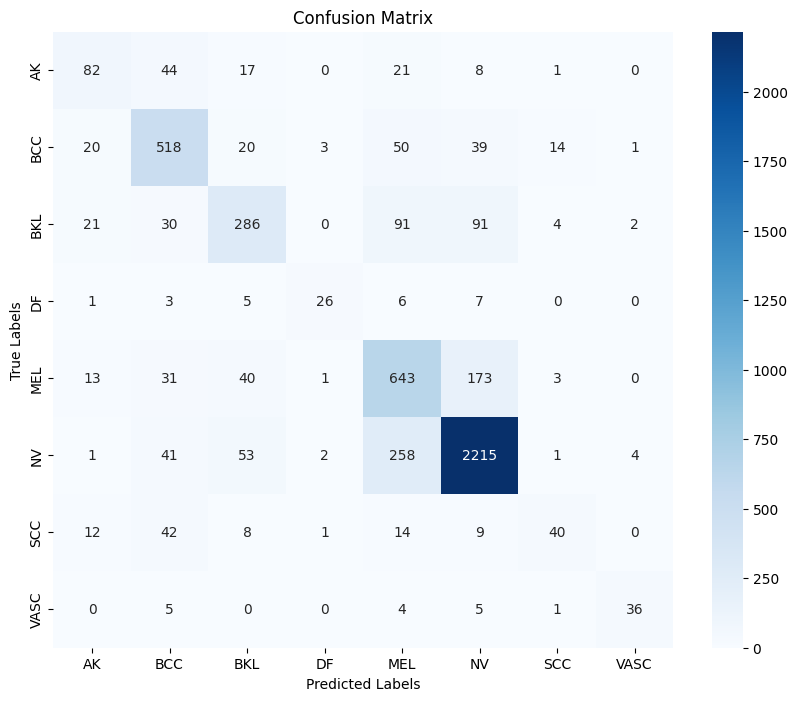

Classification Report
              precision    recall  f1-score   support

          AK       0.55      0.47      0.51       173
         BCC       0.73      0.78      0.75       665
         BKL       0.67      0.54      0.60       525
          DF       0.79      0.54      0.64        48
         MEL       0.59      0.71      0.65       904
          NV       0.87      0.86      0.86      2575
         SCC       0.62      0.32      0.42       126
        VASC       0.84      0.71      0.77        51

    accuracy                           0.76      5067
   macro avg       0.71      0.62      0.65      5067
weighted avg       0.76      0.76      0.76      5067



In [65]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Dapatkan prediksi dari test_gen
# Y_pred = model.predict(test_gen, test_gen.samples // test_gen.batch_size + 1)
Y_pred = model.predict(test_gen, steps=test_gen.samples // test_gen.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Dapatkan label asli
y_true = test_gen.classes

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Menampilkan classification report
print('Classification Report')
target_names = list(test_gen.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))


**PREDIKSI GAMBAR BESERTA NILAI AKURASINYA**

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import tensorflow as tf

# 1. Mengunggah gambar dari data testing
uploaded = files.upload()

# Asumsi file gambar yang diunggah hanya satu, dan akan diambil key-nya
img_path = list(uploaded.keys())[0]

# 2. Memuat gambar dan mengubah ukurannya sesuai dengan input model
img = load_img(img_path, target_size=(224, 224))

# Menampilkan gambar yang diunggah
plt.imshow(img)
plt.axis('off')
plt.show()

# 3. Memproses gambar agar sesuai dengan input model
img_array = img_to_array(img)            # Ubah gambar menjadi array
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
img_array = preprocess_input(img_array)  # Preprocessing sesuai dengan ResNet50

# 4. Melakukan prediksi menggunakan model
predictions = model.predict(img_array)

# 5. Menampilkan hasil prediksi
predicted_class = np.argmax(predictions)  # Mengambil kelas dengan probabilitas tertinggi
predicted_prob = np.max(predictions)      # Mengambil nilai probabilitas tertinggi

# Daftar label kelas (disesuaikan dengan dataset Anda)
class_labels = ['AK', 'BCC', 'BKL',
                'DF', 'MEL', 'NV',
                'SCC', 'VASC']

# Menampilkan hasil prediksi
predicted_label = class_labels[predicted_class]
print(f"Image prediction result: {predicted_label}")
print(f"Probability: {predicted_prob * 100:.1f} %")

In [ ]:
# Periksa ukuran dataset
num_train_samples = train_gen.samples
num_test_samples = test_gen.samples

# Periksa ukuran batch
batch_size = train_gen.batch_size

# Hitung jumlah langkah per epoch
steps_per_epoch = num_train_samples // batch_size
validation_steps = num_test_samples // batch_size

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")


In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions, axis=1)
    
    # Show the prediction results with confidence levels
    print("Predicted probabilities for each class:")
    for i, label in enumerate(labels):
        print(f"{label}: {predictions[0][i]:.4f}")

    return labels[predicted_label[0]]

# Predict an example image
img_path = 'path_to_test_image.jpg'
predicted_label = predict_image(img_path)
print(f"Predicted Label: {predicted_label}")